## Criação de modelo preditivo de deteção de casos de diabetes

In [2]:
!pip install pandas
!pip install pycaret 

  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly-5.17.0-py2.py3-none-any.whl (15.6 MB)
  Using cached MarkupSafe-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_6

In [3]:
# Livrarias utilizadas
import pandas as pd
from pycaret.classification import *

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


In [10]:
print("-"*40)
print(f"O Dataset tem {df.shape[0]} registros e {df.shape[1]} colunas")
print("-"*40)

----------------------------------------
O Dataset tem 768 registros e 9 colunas
----------------------------------------


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe() #map(lambda x: f"{x:0.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000,768.00000
mean,3.84505,120.89453,69.10547,20.53646,79.79948,31.99258,0.47188,33.24089,0.34896
std,3.36958,31.97262,19.35581,15.95222,115.24400,7.88416,0.33133,11.76023,0.47695
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.07800,21.00000,0.00000
25%,1.00000,99.00000,62.00000,0.00000,0.00000,27.30000,0.24375,24.00000,0.00000
50%,3.00000,117.00000,72.00000,23.00000,30.50000,32.00000,0.37250,29.00000,0.00000
75%,6.00000,140.25000,80.00000,32.00000,127.25000,36.60000,0.62625,41.00000,1.00000
max,17.00000,199.00000,122.00000,99.00000,846.00000,67.10000,2.42000,81.00000,1.00000


### Modelagem e inferencia de modelos

In [36]:
data_treinamento = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_teste = df.drop(data_treinamento.index).reset_index(drop=True)

print('Data para trinamento: ' + str(data_treinamento.shape))
print('Data para testar as predições: ' + str(data_teste.shape))

Data para trinamento: (691, 9)
Data para testar as predições: (77, 9)


In [14]:
exp_mclf101 = setup(data = data_treinamento, target = 'Outcome', session_id=123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(691, 9)"
4,Transformed data shape,"(691, 9)"
5,Transformed train set shape,"(483, 9)"
6,Transformed test set shape,"(208, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [15]:
#Treinamento e validação de modelos
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7658,0.8124,0.5768,0.6880,0.6167,0.4536,0.4644,0.0520
gbc,Gradient Boosting Classifier,0.7658,0.8223,0.6070,0.6785,0.6351,0.4646,0.4707,0.0280
lr,Logistic Regression,0.7616,0.8198,0.5463,0.6940,0.5959,0.4353,0.4503,0.2300
lda,Linear Discriminant Analysis,0.7616,0.8164,0.5522,0.6930,0.5991,0.4373,0.4519,0.0060
ridge,Ridge Classifier,0.7595,0.0000,0.5463,0.6900,0.5939,0.4314,0.4463,0.0060
ada,Ada Boost Classifier,0.7494,0.7968,0.5721,0.6672,0.6051,0.4256,0.4353,0.0220
qda,Quadratic Discriminant Analysis,0.7452,0.8067,0.5533,0.6535,0.5941,0.4118,0.4179,0.0060
et,Extra Trees Classifier,0.7452,0.8075,0.5364,0.6648,0.5826,0.4056,0.4163,0.0400
nb,Naive Bayes,0.7408,0.8080,0.5945,0.6265,0.6006,0.4120,0.4182,0.0060
lightgbm,Light Gradient Boosting Machine,0.7369,0.7942,0.5945,0.6220,0.6044,0.4081,0.4111,74.0950


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

### Treinamento de modelos

##### 1º Random Forest Classifier

In [16]:
#Salvando os tres melhores modelos
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8367,0.8695,0.8824,0.7143,0.7895,0.6585,0.6683
1,0.8367,0.9366,0.8824,0.7143,0.7895,0.6585,0.6683
2,0.7551,0.8336,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7708,0.7949,0.5000,0.7273,0.5926,0.4407,0.4556
4,0.7500,0.7334,0.5000,0.6667,0.5714,0.4000,0.4082
5,0.7708,0.7988,0.5625,0.6923,0.6207,0.4590,0.4641
6,0.7083,0.7148,0.5000,0.5714,0.5333,0.3226,0.3241
7,0.6875,0.8093,0.2941,0.6250,0.4000,0.2241,0.2533
8,0.8125,0.8311,0.5882,0.8333,0.6897,0.5610,0.5784


In [17]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


##### 2º Gradient Boosting Classifier

In [18]:
#Salvando os tres melhores modelos
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7959,0.9007,0.8235,0.6667,0.7368,0.5732,0.5817
1,0.8571,0.9540,0.8824,0.7500,0.8108,0.6973,0.7032
2,0.7755,0.8382,0.5882,0.7143,0.6452,0.4832,0.4881
3,0.7917,0.8008,0.6250,0.7143,0.6667,0.5161,0.5186
4,0.7292,0.7539,0.5000,0.6154,0.5517,0.3607,0.3646
5,0.7708,0.8008,0.5625,0.6923,0.6207,0.4590,0.4641
6,0.7083,0.7363,0.5000,0.5714,0.5333,0.3226,0.3241
7,0.7917,0.8501,0.5294,0.8182,0.6429,0.5052,0.5290
8,0.7083,0.7970,0.5294,0.6000,0.5625,0.3450,0.3465


In [19]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##### 3º Logistic Regression

In [20]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.9026,0.7647,0.7222,0.7429,0.6002,0.6008
1,0.8776,0.9265,0.9412,0.7619,0.8421,0.7439,0.7550
2,0.7551,0.7371,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7292,0.7695,0.4375,0.6364,0.5185,0.3390,0.3505
4,0.7500,0.7500,0.5625,0.6429,0.6000,0.4194,0.4213
5,0.7708,0.8535,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.7083,0.7598,0.3750,0.6000,0.4615,0.2759,0.2902
7,0.7292,0.8634,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7083,0.8159,0.4118,0.6364,0.5000,0.3072,0.3217


In [21]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Tunning dos modelos

##### 1º Tunning Random Forest Classifier

In [22]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7755,0.8732,0.8824,0.6250,0.7317,0.5482,0.5724
1,0.8367,0.9118,0.8824,0.7143,0.7895,0.6585,0.6683
2,0.7551,0.8585,0.7059,0.6316,0.6667,0.4741,0.4759
3,0.7708,0.8008,0.6875,0.6471,0.6667,0.4923,0.4928
4,0.6875,0.7090,0.6875,0.5238,0.5946,0.3478,0.3563
5,0.7708,0.7891,0.6875,0.6471,0.6667,0.4923,0.4928
6,0.7083,0.7500,0.6875,0.5500,0.6111,0.3824,0.3884
7,0.7292,0.8046,0.5294,0.6429,0.5806,0.3834,0.3873
8,0.8125,0.8880,0.7647,0.7222,0.7429,0.5955,0.5961


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [23]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


##### 2º Tunning Boosting Classifier

In [24]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8367,0.9338,0.8824,0.7143,0.7895,0.6585,0.6683
1,0.8776,0.9320,0.8235,0.8235,0.8235,0.7298,0.7298
2,0.7551,0.7408,0.5882,0.6667,0.6250,0.4442,0.4462
3,0.7708,0.7793,0.6250,0.6667,0.6452,0.4762,0.4767
4,0.7708,0.7383,0.5625,0.6923,0.6207,0.4590,0.4641
5,0.7292,0.7949,0.6250,0.5882,0.6061,0.4000,0.4004
6,0.7083,0.7656,0.5000,0.5714,0.5333,0.3226,0.3241
7,0.8125,0.8691,0.6471,0.7857,0.7097,0.5731,0.5790
8,0.7917,0.8767,0.5882,0.7692,0.6667,0.5190,0.5289


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_samples_leaf=4,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=190, n_iter_no_change=None,
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


##### 3º Tunning Logistic Regression

In [26]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8163,0.9044,0.7647,0.7222,0.7429,0.6002,0.6008
1,0.8776,0.9265,0.9412,0.7619,0.8421,0.7439,0.7550
2,0.7551,0.7353,0.5294,0.6923,0.6000,0.4280,0.4360
3,0.7500,0.7715,0.5000,0.6667,0.5714,0.4000,0.4082
4,0.7500,0.7500,0.5625,0.6429,0.6000,0.4194,0.4213
5,0.7708,0.8535,0.5000,0.7273,0.5926,0.4407,0.4556
6,0.7083,0.7578,0.3750,0.6000,0.4615,0.2759,0.2902
7,0.7292,0.8596,0.2941,0.8333,0.4348,0.3067,0.3787
8,0.7083,0.8235,0.4118,0.6364,0.5000,0.3072,0.3217


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [27]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Plot dos modelos

##### Plot comparação Matriz de Confução 

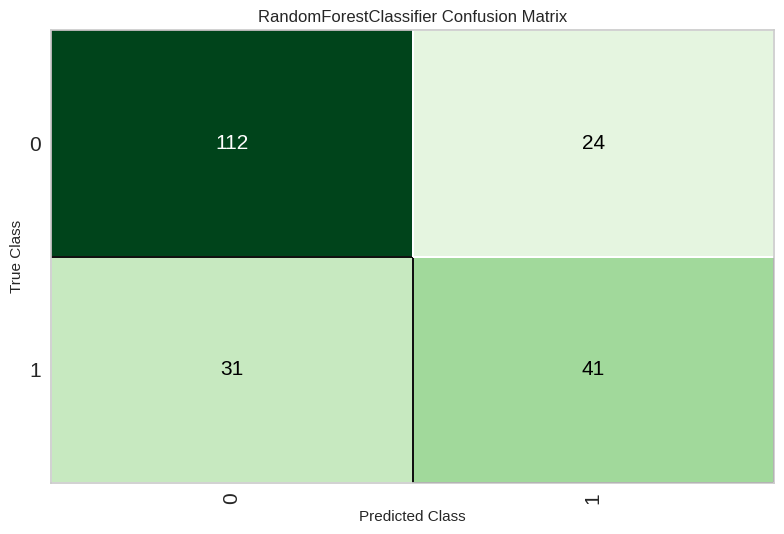

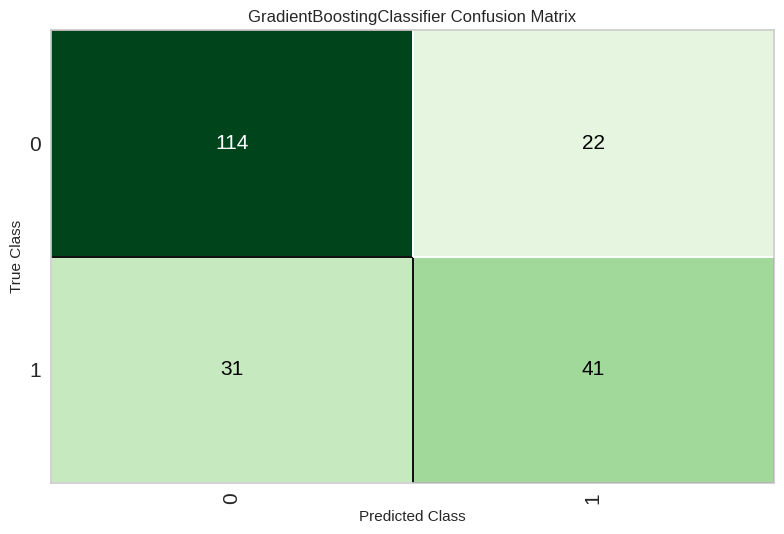

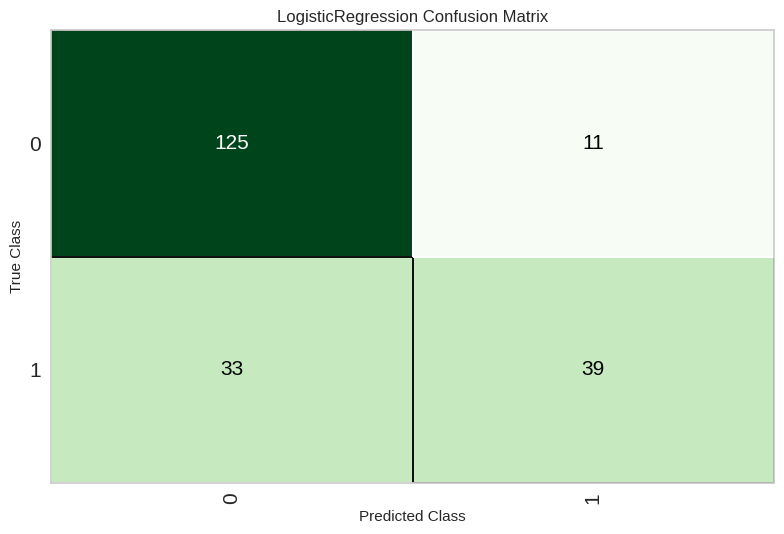

In [28]:
#plot Matriz de confução
plot_model(rf, plot = 'confusion_matrix')
plot_model(tuned_gbc, plot = 'confusion_matrix')
plot_model(tuned_lr, plot = 'confusion_matrix')


##### Plot Comparação Curva ROC AUC

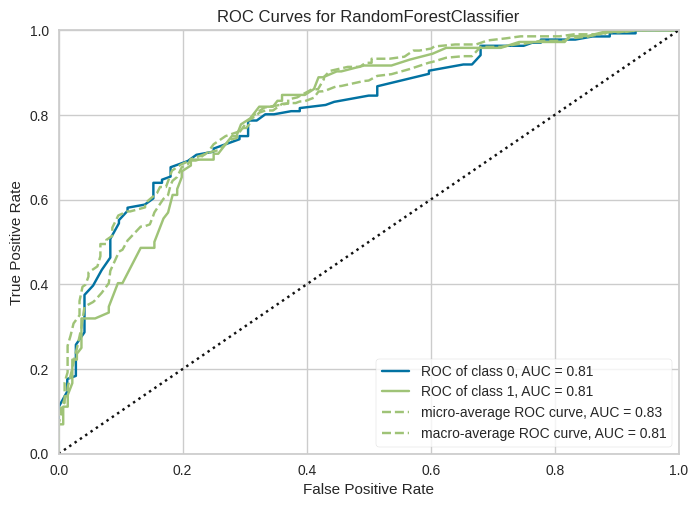

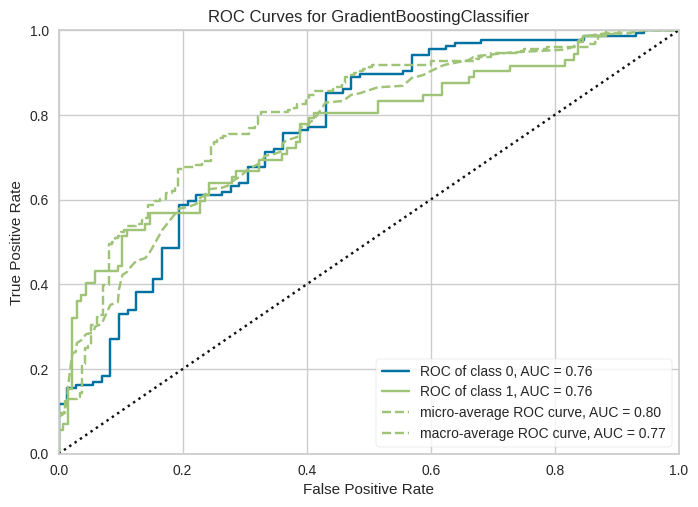

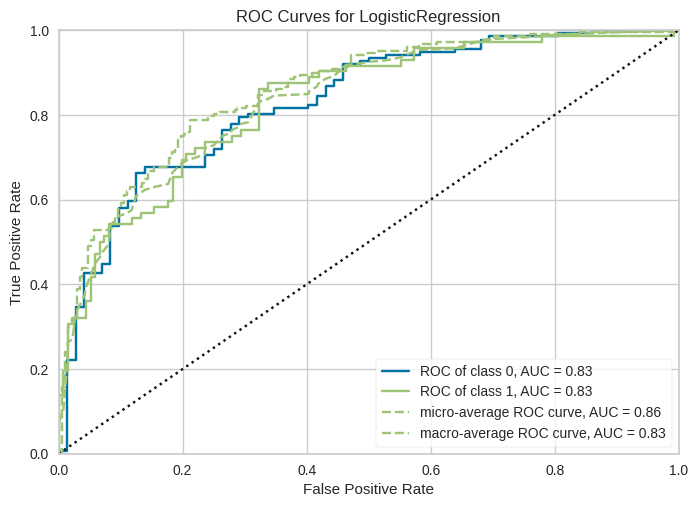

In [29]:
#plot curva ROC AUC
plot_model(rf, plot = 'auc')
plot_model(tuned_gbc, plot = 'auc')
plot_model(tuned_lr, plot = 'auc')


##### Plot Comparação de Feature Importance

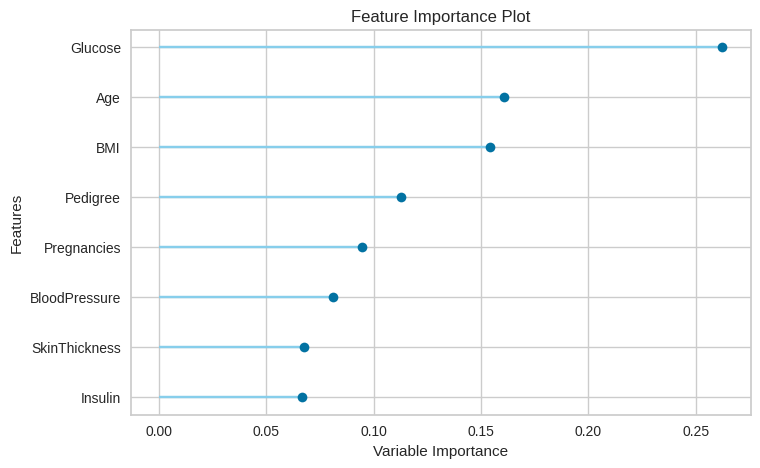

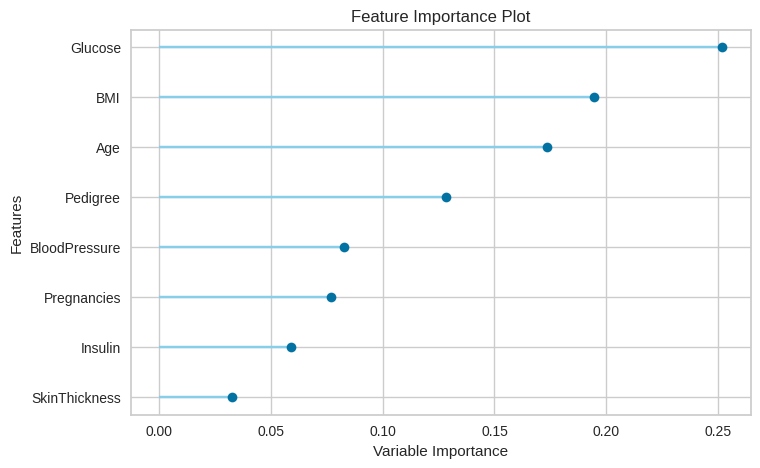

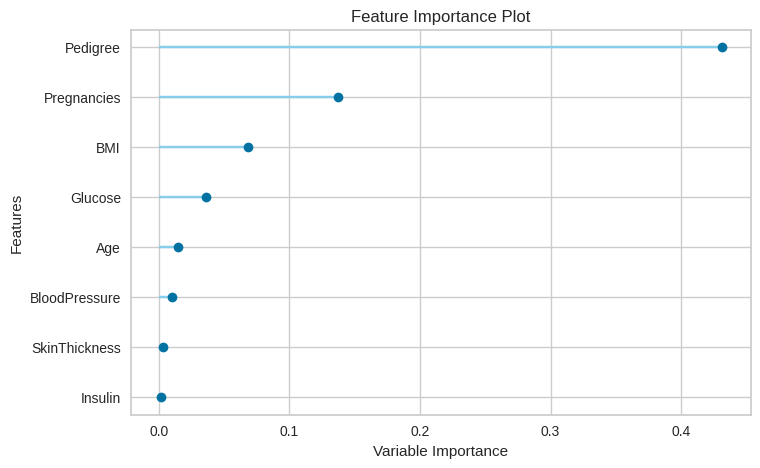

In [30]:
#plot curva ROC AUC
plot_model(rf, plot = 'feature')
plot_model(tuned_gbc, plot = 'feature')
plot_model(tuned_lr, plot = 'feature')


### Predição dos dados em teste

In [31]:
predict_model(rf)
predict_model(tuned_gbc)
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7356,0.8064,0.5694,0.6308,0.5985,0.4022,0.4033


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7452,0.7598,0.5694,0.6508,0.6074,0.4200,0.4221


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7885,0.8296,0.5417,0.7800,0.6393,0.4965,0.5130


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome,prediction_label,prediction_score
654,10,162,84,0,0,27.70000,0.18200,54,0,1,0.76970
72,1,133,102,28,140,32.80000,0.23400,45,1,0,0.76040
130,7,81,78,40,48,46.70000,0.26100,42,0,0,0.70240
216,3,182,74,0,0,30.50000,0.34500,29,1,1,0.72350
42,2,174,88,37,120,44.50000,0.64600,24,1,1,0.79160
...,...,...,...,...,...,...,...,...,...,...,...
453,9,120,72,22,56,20.80000,0.73300,48,0,0,0.66280
48,1,100,74,12,46,19.50000,0.14900,28,0,0,0.95950
71,2,121,70,32,95,39.10000,0.88600,23,0,0,0.65920
555,0,102,78,40,90,34.50000,0.23800,24,0,0,0.90400


Depois do analise das metricas dos melhores modelos tuneados, se decide escolher o Gradient Boosting Classifier	Tunning.  

### Predição com dados não vistos

In [38]:
data_new = data_teste.copy()
data_new.drop("Outcome", axis=1, inplace=True)
data_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,13,158,114,0,0,42.30000,0.25700,44
1,2,121,70,32,95,39.10000,0.88600,23
2,7,129,68,49,125,38.50000,0.43900,43
3,2,90,60,0,0,23.50000,0.19100,25
4,7,142,90,24,480,30.40000,0.12800,43


In [39]:
predict_model(tuned_gbc, data = data_teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8182,0.9222,0.6774,0.8400,0.7500,0.6097,0.6184


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome,prediction_label,prediction_score
0,13,158,114,0,0,42.30000,0.25700,44,1,1,0.90900
1,2,121,70,32,95,39.10000,0.88600,23,0,0,0.96690
2,7,129,68,49,125,38.50000,0.43900,43,1,0,0.71670
3,2,90,60,0,0,23.50000,0.19100,25,0,0,0.98840
4,7,142,90,24,480,30.40000,0.12800,43,1,1,0.95140
...,...,...,...,...,...,...,...,...,...,...,...
72,10,101,76,48,180,32.90000,0.17100,63,0,0,0.95490
73,2,122,70,27,0,36.80000,0.34000,27,0,0,0.85330
74,5,121,72,23,112,26.20000,0.24500,30,0,0,0.87730
75,1,126,60,0,0,30.10000,0.34900,47,1,0,0.84970


### Salvando o modelo

In [40]:
save_model(tuned_gbc, 'pipeline_model_gbc_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI', 'Pedigree',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'...
          

In [45]:
model_gbc = load_model('pipeline_model_gbc_v1')

Transformation Pipeline and Model Successfully Loaded
